In [1]:
import numpy.random as rand
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

Нам задали довольно жесткие ограничения на параметр $\theta$. Всвязи с этим возмем конкретное апостриорное распределение $N(0, \sigma^2)$, где $\sigma^2$ можно определить из соотношения $P(|\theta|<0.5) = 0.95$

$P(|\theta|<0.5) = \int_{-\frac{1}{2}}^{\frac{1}{2}}p_\theta(x)dx = \int_{-\frac{1}{2}}^{\frac{1}{2}}\frac{1}{\sqrt{2\pi\sigma^2}}e^{-\frac{x^2}{2\sigma^2}}dx = 0.95$, откуда $\sigma^2 = \frac{1}{16}$

Итак, используем апостриорное рапределение $N(0, \frac{1}{16})$

In [2]:
N, mu = 1000, 0
prioriMu, prioriSigma = 0, 1/4

values = np.random.standard_cauchy(N)

In [3]:
class Evaluation:
    def __init__(self, data, name, real):
        self.name = name
        self.data = np.array(data)
        self.real = real

    def plot(self, maxY):
        axis.plot(np.abs(self.data - self.real), label=r"{}".format(self.name))
        axis.legend(loc="upper left")
        axis.set_xlabel("n")
        axis.set_ylabel(r"Evaluations")
        axis.set_ylim(0, maxY)
        axis.set_title(r"Evaluations")

In [4]:
evaluations = []

evaluations.append(Evaluation([values[:n + 1].mean() for n in range(N)], "MMP", mu))
evaluations.append(Evaluation(
    [(prioriMu + prioriSigma * np.sum(values[:n + 1])) / (1 + n * prioriSigma) for n in range(N)],
    "Priori $N({}, {})$".format(prioriMu, prioriSigma),
    mu
))

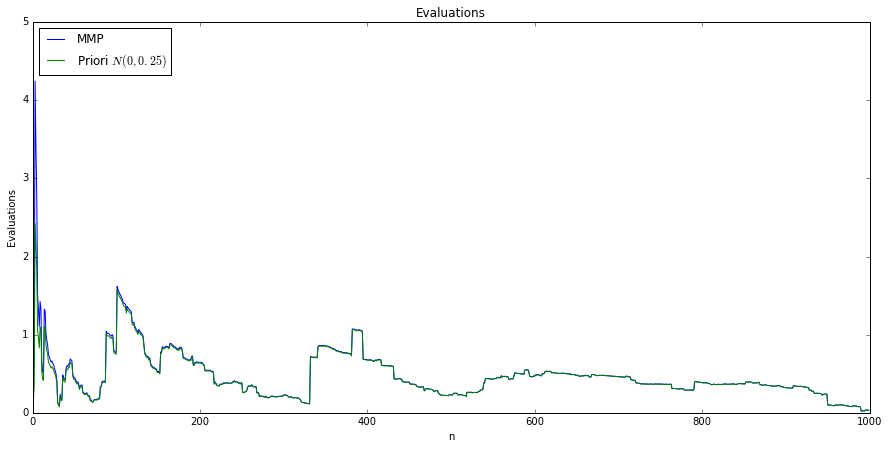

In [5]:
# Строим графики абсолютных величин

figure = plt.figure(figsize=(15,7))
axis = figure.add_subplot(1, 1, 1)
for evaluation in evaluations:
    evaluation.plot(5)